# This is Heart Disease Predtion Project
we are going to predict based on the data whether someone have the heart disease or not

* 1- Problem Defination
* 2- Data
* 3- Evaluate 
* 4- Feature
* 5- Modelling
* 6- Experimentations


# 1-Problem Defination
> Based on the given data whe need to predict if a patient has heart disease or not

# 2- Data
> We have the data and have loaded it alread

# 3- Evaluate
> In initial stages we need to make sure, if our model gives us the accuray of 95%

# 4- Features
> What features are import, what features columns means what

age=>
age in years

sex=>
(1 = male; 0 = female)

cp=>
chest pain type

trestbps=>
resting blood pressure (in mm Hg on admission to the hospital)


chol=>
serum cholestoral in mg/dl


fbs=>
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)


restecg=>
resting electrocardiographic results


thalach=>
maximum heart rate achieved


exang=>
exercise induced angina (1 = yes; 0 = no)


oldpeak=>
ST depression induced by exercise relative to rest


slope=>
the slope of the peak exercise ST segment


ca=>
number of major vessels (0-3) colored by flourosopy


thal=>
3 = normal; 6 = fixed defect; 7 = reversable defect

target=>
1 or 0

# Tools Preparation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing Models of skleanr
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Evaluation Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# Exploring the Data Initial Stage

1- What problem i am going to solve
2- What kind of data i have
3- Does this data have missing values
4- Are there any outliers, sporious vectors 
5- Can we add or remove some of the feartures


In [5]:
df = pd.read_csv('datasets_33180_43520_heart.csv')
df.shape

(303, 14)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

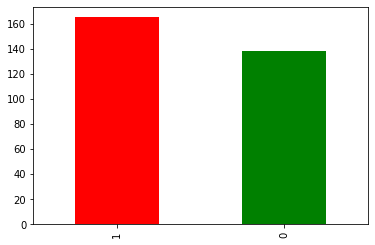

In [11]:
df['target'].value_counts().plot(kind='bar', color=['red','green']);

In [12]:
df.isna().sum() # Are there any missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [16]:
len(df)

303

In [19]:
pd.crosstab(df.target,df.sex)


sex,0,1
target,,
0,24,114
1,72,93


In [20]:
72/96

0.75

In [21]:
93/207

0.4492753623188406

(array([0, 1]), <a list of 2 Text xticklabel objects>)

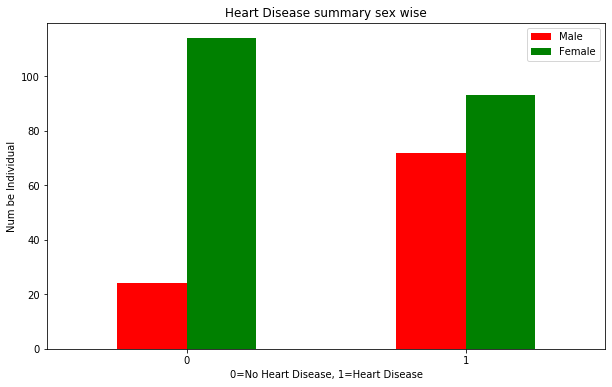

In [24]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel("Num be Individual")
plt.legend(["Male","Female"])
plt.xticks(rotation=0)